# **Section3_Use Torchquantum on Pulse Level**

# Setup

In [ ]:
print('Installing torchquantum...')
!git clone https://github.com/mit-han-lab/torchquantum.git
%cd /content/torchquantum
!pip install --editable . 1>/dev/null

Installing torchquantum...
fatal: destination path 'torchquantum' already exists and is not an empty directory.
/content/torchquantum
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-nature 0.4.4 requires qiskit-terra>=0.21.0, but you have qiskit-terra 0.18.3 which is incompatible.


In [ ]:
!pip install qiskit_nature==0.4.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached qiskit_terra-0.21.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.7 MB)
  Attempting uninstall: qiskit-terra
    Found existing installation: qiskit-terra 0.18.3
    Uninstalling qiskit-terra-0.18.3:
      Successfully uninstalled qiskit-terra-0.18.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit 0.32.1 requires qiskit-terra==0.18.3, but you have qiskit-terra 0.21.2 which is incompatible.


In [ ]:
!pip install qiskit==0.38.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached qiskit-0.38.0-py3-none-any.whl
  Using cached qiskit_aer-0.11.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.2 MB)
  Using cached qiskit_ibmq_provider-0.19.2-py3-none-any.whl (240 kB)
  Attempting uninstall: qiskit-ibmq-provider
    Found existing installation: qiskit-ibmq-provider 0.18.1
    Uninstalling qiskit-ibmq-provider-0.18.1:
      Successfully uninstalled qiskit-ibmq-provider-0.18.1
  Attempting uninstall: qiskit-aer
    Found existing installation: qiskit-aer 0.9.1
    Uninstalling qiskit-aer-0.9.1:
      Successfully uninstalled qiskit-aer-0.9.1
  Attempting uninstall: qiskit
    Found existing installation: qiskit 0.32.1
    Uninstalling qiskit-0.32.1:
      Successfully uninstalled qiskit-0.32.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the followin

In [ ]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchquantum 0.1.2 requires matplotlib>=3.3.2, but you have matplotlib 3.1.3 which is incompatible.
torchquantum 0.1.2 requires qiskit==0.32.1, but you have qiskit 0.38.0 which is incompatible.


In [ ]:
from torchquantum.pulse_utils import *
import torch
import torch.nn.functional as F
import torch.optim as optim
import argparse

In [ ]:
import torchquantum as tq
import torchquantum.functional as tqf
import pdb
import numpy as np
from matplotlib import pyplot as plt

# **3.1 Quantum Optimal Control**

Optimal control can be used to achieve efficient state preparation, state-to-state transfer or some unitary matrix on a quantum system. Current quantum systems can be manipulated in a controlled way, such as the time-varying amplitude of microwave pulses that act on a superconducting circuit.

In the simple example below, QOC is used to achieve a rotation gate, and we use pulses to achieve such target. The pulses are composed of four time steps with different amplitudes. The control Hamiltonian is the Pauli-X. In this gradient-based optimization we will be able to achieve the target unitary with desired accuracy.

Parameter containing:
tensor([0.9950, 0.9950, 0.9950, 0.9950], requires_grad=True)
tensor([[-0.6686+0.0000j,  0.0000+0.7436j],
        [ 0.0000+0.7436j, -0.6686+0.0000j]], grad_fn=<MmBackward0>)
Parameter containing:
tensor([0.9900, 0.9900, 0.9900, 0.9900], requires_grad=True)
tensor([[-0.6834+0.0000j,  0.0000+0.7300j],
        [ 0.0000+0.7300j, -0.6834+0.0000j]], grad_fn=<MmBackward0>)
Parameter containing:
tensor([0.9850, 0.9850, 0.9850, 0.9850], requires_grad=True)
tensor([[-0.6979+0.0000j,  0.0000+0.7162j],
        [ 0.0000+0.7162j, -0.6979+0.0000j]], grad_fn=<MmBackward0>)
Parameter containing:
tensor([0.9800, 0.9800, 0.9800, 0.9800], requires_grad=True)
tensor([[-0.7121+0.0000j,  0.0000+0.7021j],
        [ 0.0000+0.7021j, -0.7121+0.0000j]], grad_fn=<MmBackward0>)
Parameter containing:
tensor([0.9749, 0.9749, 0.9749, 0.9749], requires_grad=True)
tensor([[-0.7261+0.0000j,  0.0000+0.6876j],
        [ 0.0000+0.6876j, -0.7261+0.0000j]], grad_fn=<MmBackward0>)
Parameter containing:
ten

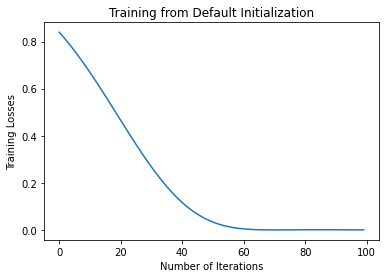

In [ ]:
theta = 0.6
target_unitary = torch.tensor([[np.cos(theta/2), -1j*np.sin(theta/2)], [-1j*np.sin(theta/2), np.cos(theta/2)]], dtype=torch.complex64)
# The target_unitary is a simple rotation gate with angle = 0.6;
pulse = tq.QuantumPulseDirect(n_steps=4,
                              hamil=[[0, 1], [1, 0]])
# The pulse has 4 time slots and the drive Hamiltonian is the Pauli-X.
optimizer = optim.Adam(params=pulse.parameters(),  lr=5e-3)

# TODO(jinleic): 
# add Bloch Sphere here
# add figure for pulse time slots
# Can we see the learning curve?
losses = []

for k in range(100):
    # loss = (abs(pulse.get_unitary() - target_unitary)**2).sum()
    loss = 1 - (torch.trace(pulse.get_unitary() @ target_unitary) / target_unitary.shape[0]).abs() ** 2
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    # print(pulse.pulse_shape.grad)
    # print(loss)
    print(pulse.pulse_shape)
    print(pulse.get_unitary())
plt.xlabel("Number of Iterations")
plt.ylabel("Training Losses")
plt.title("Training from Default Initialization")
plt.plot(losses[:100])

Since the pulses are generated in an iterative way. The initialization of pulses will influence the number of iterations. It would be great if we can choose a better starting point. Intuitively, if pulses are initialized from a "close" or "similar" target unitary matrix, we will able to reduce the number of iterations. In the following example, we simply show that the pulses are initialized from previous unitary matrix and it can help achieve convergence faster.

Parameter containing:
tensor([0.7118, 0.7118, 0.7118, 0.7118], requires_grad=True)
tensor([[-0.9570+0.0000j,  0.0000-0.2900j],
        [ 0.0000-0.2900j, -0.9570+0.0000j]], grad_fn=<MmBackward0>)
Parameter containing:
tensor([0.7167, 0.7167, 0.7167, 0.7167], requires_grad=True)
tensor([[-0.9625+0.0000j,  0.0000-0.2713j],
        [ 0.0000-0.2713j, -0.9625+0.0000j]], grad_fn=<MmBackward0>)
Parameter containing:
tensor([0.7213, 0.7213, 0.7213, 0.7213], requires_grad=True)
tensor([[-0.9673+0.0000j,  0.0000-0.2537j],
        [ 0.0000-0.2537j, -0.9673+0.0000j]], grad_fn=<MmBackward0>)
Parameter containing:
tensor([0.7252, 0.7252, 0.7252, 0.7252], requires_grad=True)
tensor([[-0.9712+0.0000j,  0.0000-0.2384j],
        [ 0.0000-0.2384j, -0.9712+0.0000j]], grad_fn=<MmBackward0>)
Parameter containing:
tensor([0.7282, 0.7282, 0.7282, 0.7282], requires_grad=True)
tensor([[-0.9740+0.0000j,  0.0000-0.2267j],
        [ 0.0000-0.2267j, -0.9740+0.0000j]], grad_fn=<MmBackward0>)
Parameter containing:
ten

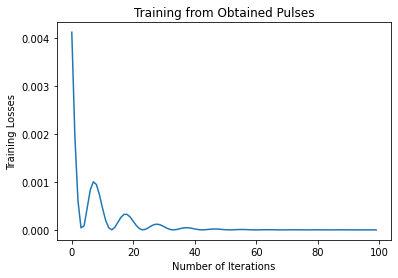

In [ ]:
theta = 0.5
target_unitary = torch.tensor([[np.cos(theta/2), -1j*np.sin(theta/2)], [-1j*np.sin(theta/2), np.cos(theta/2)]], dtype=torch.complex64)
optimizer = optim.Adam(params=pulse.parameters(),  lr=5e-3)
# We notice that the initial state matters when performing QOC.
# Better initialization can save some time.

# TODO(jinleic): 
# add Bloch Sphere here
# add figure for pulse time slots (before and after QOC)
losses = []

for k in range(100):
    # loss = (abs(pulse.get_unitary() - target_unitary)**2).sum()
    loss = 1 - (torch.trace(pulse.get_unitary() @ target_unitary) / target_unitary.shape[0]).abs() ** 2
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # print(pulse.pulse_shape.grad)
    # print(loss)
    print(pulse.pulse_shape)
    print(pulse.get_unitary())

plt.xlabel("Number of Iterations")
plt.ylabel("Training Losses")
plt.title("Training from Obtained Pulses")
plt.plot(losses[:100])

tensor(0.8438, grad_fn=<RsubBackward1>)
tensor([[-0.5907+0.3830j,  0.2483+0.3830j,  0.0000+0.2220j,  0.4967+0.0000j],
        [ 0.2483+0.3830j, -0.5907+0.3830j,  0.4967+0.0000j,  0.0000+0.2220j],
        [ 0.2483+0.3830j,  0.2483-0.1610j, -0.3424+0.0000j,  0.0000+0.7660j],
        [ 0.2483-0.1610j,  0.2483+0.3830j,  0.0000+0.7660j, -0.3424+0.0000j]],
       grad_fn=<MmBackward0>)
tensor(0.7897, grad_fn=<RsubBackward1>)
tensor([[-0.6477+0.3753j,  0.2175+0.3753j,  0.0000+0.2493j,  0.4350+0.0000j],
        [ 0.2175+0.3753j, -0.6477+0.3753j,  0.4350+0.0000j,  0.0000+0.2493j],
        [ 0.2175+0.3753j,  0.2175-0.1261j, -0.4302+0.0000j,  0.0000+0.7507j],
        [ 0.2175-0.1261j,  0.2175+0.3753j,  0.0000+0.7507j, -0.4302+0.0000j]],
       grad_fn=<MmBackward0>)
tensor(0.7257, grad_fn=<RsubBackward1>)
tensor([[-0.7031+0.3618j,  0.1861+0.3617j,  0.0000+0.2660j,  0.3723+0.0000j],
        [ 0.1861+0.3617j, -0.7031+0.3618j,  0.3723+0.0000j,  0.0000+0.2660j],
        [ 0.1861+0.3617j,  0.1861-0.09

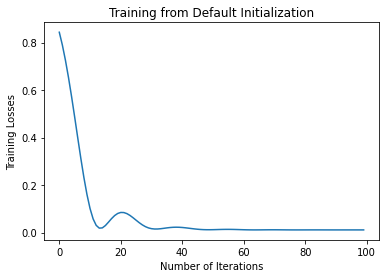

In [ ]:
theta = 0.6
target_unitary = torch.tensor(
    [[1, 0, 0, 0],
      [0, 1, 0, 0],
      [0, 0, np.cos(theta/2), -1j*np.sin(theta/2)],
      [0, 0, -1j*np.sin(theta/2), np.cos(theta/2)],
      ], dtype=torch.complex64)

pulse_q0 = tq.QuantumPulseDirect(n_steps=10,
                                  hamil=[[0, 1], [1, 0]])
pulse_q1 = tq.QuantumPulseDirect(n_steps=10,
                                  hamil=[[0, 1], [1, 0]])
pulse_q01 = tq.QuantumPulseDirect(n_steps=10,
                                  hamil=[[1, 0, 0, 0],
                                          [0, 1, 0, 0],
                                          [0, 0, 0, 1],
                                          [0, 0, 1, 0],
                                          ]
                                  )

optimizer = optim.Adam(params=list(pulse_q0.parameters()) + list(pulse_q1.parameters()) + list(pulse_q01.parameters()), lr=5e-3)

losses = []

for k in range(100):
    u_0 = pulse_q0.get_unitary()
    u_1 = pulse_q1.get_unitary()
    u_01 = pulse_q01.get_unitary()
    # overall_u = u_01
    overall_u = torch.kron(u_0, u_1) @ u_01
    # loss = (abs(pulse.get_unitary() - target_unitary)**2).sum()
    loss = 1 - (torch.trace(overall_u @ target_unitary) / target_unitary.shape[0]).abs() ** 2
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # print(pulse.pulse_shape.grad)
    print(loss)
    # print(pulse.pulse_shape)
    # print(pulse.get_unitary())
    print(overall_u)

plt.xlabel("Number of Iterations")
plt.ylabel("Training Losses")
plt.title("Training from Default Initialization")
plt.plot(losses[:100])


tensor(0.0085, grad_fn=<RsubBackward1>)
tensor([[-9.8648e-01-1.4689e-01j,  1.0692e-02-7.1807e-02j,
          0.0000e+00+3.5304e-04j, -7.9124e-05+0.0000e+00j],
        [ 1.0692e-02-7.1807e-02j, -9.8648e-01-1.4689e-01j,
         -7.9124e-05+0.0000e+00j,  0.0000e+00+3.5304e-04j],
        [-5.3144e-05+3.5691e-04j, -2.5980e-05-3.8684e-06j,
         -9.7579e-01+0.0000e+00j,  0.0000e+00-2.1869e-01j],
        [-2.5980e-05-3.8684e-06j, -5.3144e-05+3.5691e-04j,
          0.0000e+00-2.1869e-01j, -9.7579e-01+0.0000e+00j]],
       grad_fn=<MmBackward0>)
tensor(0.0134, grad_fn=<RsubBackward1>)
tensor([[-0.9937-9.7513e-02j,  0.0022-2.2524e-02j,  0.0000-4.9257e-02j,
          0.0060+0.0000e+00j],
        [ 0.0022-2.2524e-02j, -0.9937-9.7513e-02j,  0.0060+0.0000e+00j,
          0.0000-4.9257e-02j],
        [ 0.0048-4.9367e-02j,  0.0011+1.0980e-04j, -0.9915+0.0000e+00j,
          0.0000-1.2004e-01j],
        [ 0.0011+1.0980e-04j,  0.0048-4.9367e-02j,  0.0000-1.2004e-01j,
         -0.9915+0.0000e+00j]], 

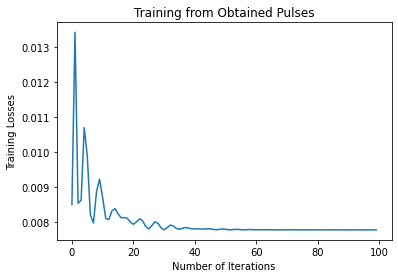

In [ ]:
theta = 0.5
target_unitary = torch.tensor(
    [[1, 0, 0, 0],
      [0, 1, 0, 0],
      [0, 0, np.cos(theta/2), -1j*np.sin(theta/2)],
      [0, 0, -1j*np.sin(theta/2), np.cos(theta/2)],
      ], dtype=torch.complex64)

optimizer = optim.Adam(params=list(pulse_q0.parameters()) + list(pulse_q1.parameters()) + list(pulse_q01.parameters()), lr=5e-3)

losses = []
for k in range(100):
    u_0 = pulse_q0.get_unitary()
    u_1 = pulse_q1.get_unitary()
    u_01 = pulse_q01.get_unitary()
    # overall_u = u_01
    overall_u = torch.kron(u_0, u_1) @ u_01
    # loss = (abs(pulse.get_unitary() - target_unitary)**2).sum()
    loss = 1 - (torch.trace(overall_u @ target_unitary) / target_unitary.shape[0]).abs() ** 2
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # print(pulse.pulse_shape.grad)
    print(loss)
    # print(pulse.pulse_shape)
    # print(pulse.get_unitary())
    print(overall_u)


plt.xlabel("Number of Iterations")
plt.ylabel("Training Losses")
plt.title("Training from Obtained Pulses")
plt.plot(losses[:100])

# **3.2 Variational Pulse Learning**

Varitional pulse control schme is designed to avoid drawbacks of gate level approaches as well as quantum optimal control. We try to find a intermdiate level of pulse control abstraction and post optimization algorithms to improve the pulses and finally achieves better performance on quantum algorithm on NISQ machines.

## **Native Pulse Build-up**

Set the backend, please note that pulse is hardware dependent, it varying with every calibration and also different with devices.

In [ ]:
backend = FakeJakarta()

SNP is namly a single-qubit native pulse, and TNP is two-qubit native pulse, we use this as a example to build the pulse ansatz for VQE task.

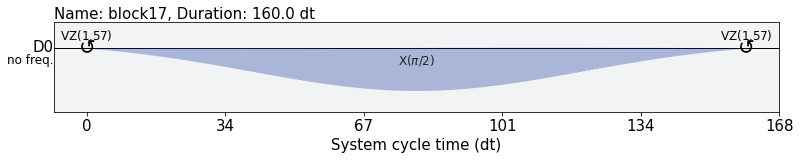

In [ ]:
sched0 = snp(0, backend)
sched0.draw()

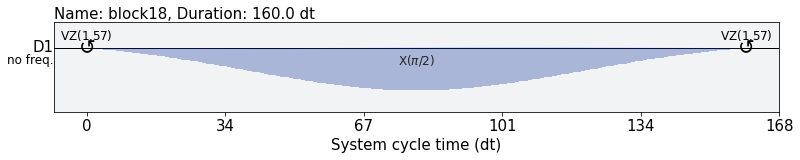

In [ ]:
sched1 = snp(1, backend)
sched1.draw()

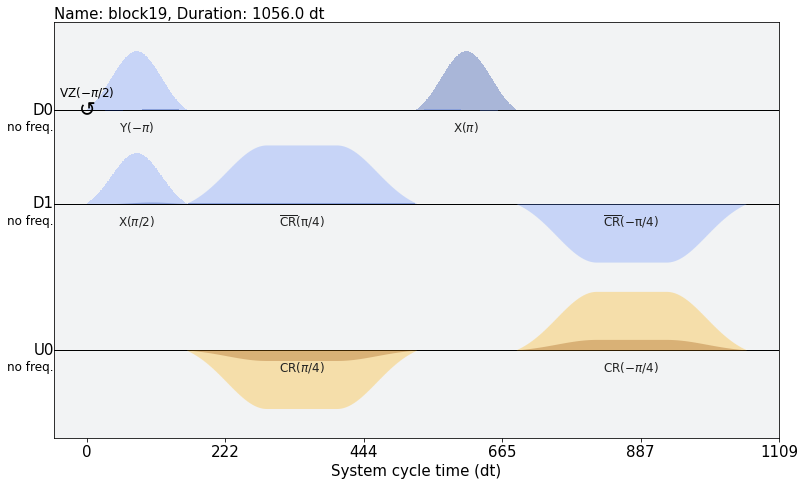

In [ ]:
sched2 = tnp(0,1,backend)
sched2.draw()

pul_append is a method to combine two schedules.

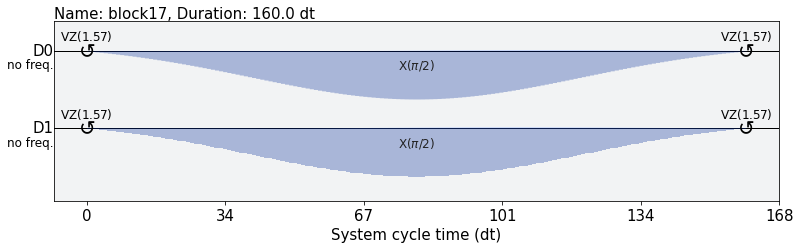

In [ ]:
pulse_ansatz = pul_append(sched0, sched1)
pulse_ansatz.draw()

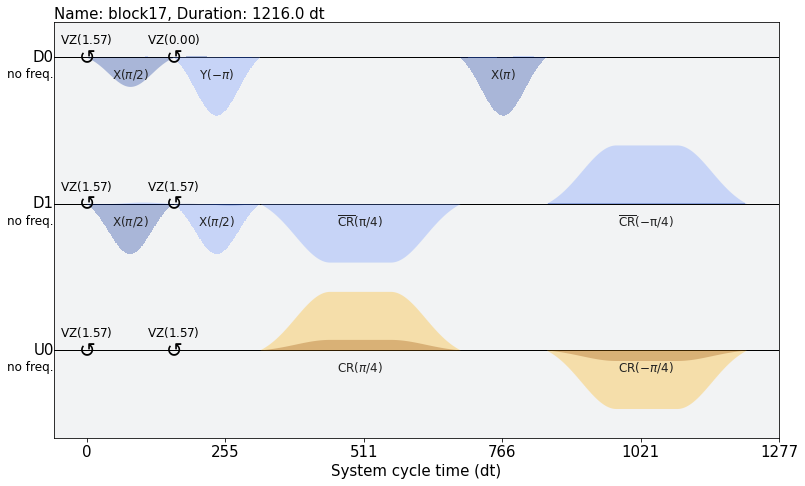

In [ ]:
pulse_ansatz = pul_append(pulse_ansatz, sched2)
pulse_ansatz.draw()

In torchquantum, extract_amp can use to get the amplitudes from pulses, you can also choose extract_realamp for only the real part of pulse amplitudes and ignore the imaginary part. We also have extract_phase to get the classical phase from pulses.

In [ ]:
parameters_array = extract_amp(pulse_ansatz)
print(parameters_array)

[ 0.1007186   0.00833101  0.096837    0.02080554  0.20122114 -1.57079633
  0.096837    0.02080554  0.11225338  0.01509274  0.7727792  -2.96348159
  0.20122114  0.          0.11225338 -3.12649991  0.7727792   0.17811106]


## **VQE Model Setup**

Here we use an example of Hydrogen molecule. And we give a pauli string here based on sto3g basis and with parity mapping as well as two-qubit reduction.

In [ ]:
n_qubit = 2
pauli_dict = {'II': -1.0523732, 'IZ': 0.39793742, 'ZI': -0.3979374, 'ZZ': -0.0112801, 'XX':0.18093119}

map_amp is a method in torchquantum introduce to map the adjusted amplitude to the pulses then get new pulses and send to quantum machine. observe_generate is a method to genrate the observe-pulses of the hydrogen molecule. run_pulse_sim is use to run the updated pulses in pulse simulator.

In [ ]:
def vqe(cur_best_w):
    backend = FakeJakarta()
    modified_list = ((cur_best_w[:int(len(cur_best_w)/2)])*np.cos(cur_best_w[int(len(cur_best_w)/2):]) + (cur_best_w[:int(len(cur_best_w)/2)])*np.sin(cur_best_w[int(len(cur_best_w)/2):])*1j)
    modified_list = np.ndarray.tolist(modified_list)
    sched1 = snp(0, backend)
    sched2 = tnp(0,1,backend)
    pulse_ansatz = pul_append(sched1, sched2)
    prepulse = map_amp(pulse_ansatz, modified_list)
    measurement_pulse = observe_genearte(prepulse, backend)
    XX_YY_ZZ_expect = run_pulse_sim(measurement_pulse)
    H_expect = pauli_dict['II'] + pauli_dict['IZ']*XX_YY_ZZ_expect[0] + pauli_dict['ZI']*XX_YY_ZZ_expect[1] + pauli_dict['XX']*XX_YY_ZZ_expect[2] + pauli_dict['ZZ']*XX_YY_ZZ_expect[3]
    return H_expect

Note, here we use COBYLA as the optimizer to train the pulse ansatz.

In [ ]:
vqe_result = minimize(vqe, parameters_array, method='COBYLA', constraints=gen_LC(parameters_array),
                        options={'rhobeg': 0.1, 'maxiter': 2, 'disp': True})
print('The estimated ground state energy from pulse level VQE algorithm is: {}'.format(vqe_result.fun))
print("\nThe optimal parameter theta is : {} ".format(vqe_result.x))

/usr/local/lib/python3.7/dist-packages/qiskit/compiler/assembler.py:461: RuntimeWarning: Dynamic rep rates are supported on this backend. 'rep_delay' will be used instead of 'rep_time'.
  RuntimeWarning,
